<a href="https://colab.research.google.com/github/Mehrabani59/Sentiment-Analysis/blob/main/FinalProjectNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages
!pip install praw
!pip install nltk
!pip install gensim

# Download NLTK data
!python -m nltk.downloader stopwords

# Import libraries
import praw
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import time

# Download additional NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')

# Import more libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models.coherencemodel import CoherenceModel
from nltk.sentiment import SentimentIntensityAnalyzer
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk import bigrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from collections import Counter
from datetime import datetime

# Import scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime, timezone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.4 MB/s eta 0:00:00
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# authentication
reddit = praw.Reddit(
    client_id='iYWa9ZPCn58MTlFTWC5tvg',
    client_secret='tyJphscsK7lwa9j7LMjc9KQU3Jqdhg',
    user_agent='windows:com.example.myredditapp:v1.0 (by /u/myusername)'
)

In [ ]:
#Details of keywords or search terms used
subreddit = reddit.subreddit('Geopolitics')
subreddit_name = 'Geopolitics'
keywords = [
    '2024 US Presidential Election',
    'Middle Eastern tensions',
    'US foreign policy Middle East',
    'US election Middle East impact',
    'Middle East peace process',
    'US-Middle East relations',
    'US election geopolitical impact',
    'US election foreign policy'
]

In [ ]:
# Extract comments up to the third level and filter by date
def extract_comments(submission, limit=3):
    submission.comments.replace_more(limit=None)
    comments = submission.comments.list()

    results = []
    for comment in comments:
        top_level_comment_date = datetime.fromtimestamp(comment.created_utc, tz=timezone.utc)
        if top_level_comment_date.year < 2023:
            continue

        top_level_comment = comment.body if comment.body else ''
        second_level_comment = ''
        third_level_comment = ''

        if comment.replies:
            second_replies = comment.replies.list()
            if second_replies:
                second_level_comment_date = datetime.fromtimestamp(second_replies[0].created_utc, tz=timezone.utc)
                if second_level_comment_date.year >= 2023:
                    second_level_comment = second_replies[0].body if second_replies[0].body else ''
                    if second_replies[0].replies:
                        third_replies = second_replies[0].replies.list()
                        if third_replies:
                            third_level_comment_date = datetime.fromtimestamp(third_replies[0].created_utc, tz=timezone.utc)
                            if third_level_comment_date.year >= 2023:
                                third_level_comment = third_replies[0].body if third_replies[0].body else ''

        results.append((top_level_comment, top_level_comment_date, second_level_comment, third_level_comment))
        if len(results) >= limit:
            break
    return results

In [ ]:
# Collect posts and comments
data = []
maxData = 2000

for keyword in keywords:
    for submission in subreddit.search(keyword, limit=None):
        if len(data) >= maxData:
            break

        time.sleep(1)

        submission_date = datetime.fromtimestamp(submission.created_utc, tz=timezone.utc)
        if submission_date.year < 2023:
            continue

        comments_data = extract_comments(submission)
        for comments in comments_data:
            data.append({
                'title': submission.title,
                'selftext': submission.selftext,
                'top_level_comment': comments[0],
                'top_level_comment_date': comments[1],
                'second_level_comment': comments[2],
                'third_level_comment': comments[3]
            })

        if len(data) >= maxData:
            break


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
dataset_path = '/content/The_USA_Election.csv'
data = pd.read_csv(dataset_path)

In [ ]:
with open("dataset_before_cleaning.txt", "w") as file:
    file.write(data)

In [ ]:

nltk.download("stopwords")
def clean_and_stem(text):
    # Example cleaning and stemming
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))  # Get stopwords set for English
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Stemming the words and removing stopwords
    return ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#append cleaned data
cleaned_posts = []
for row in data:
    title = clean_and_stem(row['title'])
    selftext = clean_and_stem(row['selftext'])
    top_level_comment = clean_and_stem(row['top_level_comment'])
    top_level_comment_date = row['top_level_comment_date'].strftime('%Y-%m-%d')
    second_level_comment = clean_and_stem(row['second_level_comment'])
    third_level_comment = clean_and_stem(row['third_level_comment'])

    submission_date = datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d')

    cleaned_posts.append({
        'title': title,
        'selftext': selftext,
        'top_level_comment': top_level_comment,
        'top_level_comment_date': top_level_comment_date,
        'second_level_comment': second_level_comment,
        'third_level_comment': third_level_comment
    })

In [ ]:
df_cleaned = pd.DataFrame(cleaned_posts)
df_cleaned['top_level_comment_date'] = pd.to_datetime(df_cleaned['top_level_comment_date'])
df_cleaned.head()

,title,selftext,top_level_comment,top_level_comment_date,second_level_comment,third_level_comment
0,china go interfer us presidenti elect candid t...,trump biden tough china china go interfer us p...,im sure candid prc would prefer possibl strate...,2024-05-03,that counter prc one issu parti consensu opinion,opinion thing consid divid congress govern wou...
1,china go interfer us presidenti elect candid t...,trump biden tough china china go interfer us p...,trump he isolationist inflammatori toward alli...,2024-05-03,trump declar trade war lost support russia nat...,biden kept trump tariff sanction ad im confuse...
2,china go interfer us presidenti elect candid t...,trump biden tough china china go interfer us p...,us democraci enemi your go want candid caus ch...,2024-05-03,tend agre us simpli enemi theyr also econom de...,
3,iran recent presidenti elect mean relat us,iran elect reformist candid name masoud pezesh...,dont think itll mean anyth presid titular impo...,2024-07-09,protest accord gamaan iranian want total refor...,think long hand hold gun agre ayatollah peopl ...
4,iran recent presidenti elect mean relat us,iran elect reformist candid name masoud pezesh...,much suprem leader control foreign polici revo...,2024-07-09,,


In [ ]:
all_text = ' '.join(df_cleaned['title'] + ' ' + df_cleaned['selftext'] + ' ' + df_cleaned['top_level_comment'] +
                    ' ' + df_cleaned['second_level_comment'] + ' ' + df_cleaned['third_level_comment'])
tokens = word_tokenize(all_text)
#remove stopwords
tokens = [token.lower() for token in tokens if token.isalpha() and token not in stopwords.words('english')]
#find common words
word_freq = Counter(tokens)
most_common_words = word_freq.most_common(20)
most_common_words

[('us', 4013),
 ('china', 2809),
 ('would', 2553),
 ('war', 2478),
 ('russia', 2254),
 ('iran', 1988),
 ('countri', 1979),
 ('israel', 1896),
 ('like', 1798),
 ('power', 1469),
 ('middl', 1308),
 ('could', 1305),
 ('also', 1302),
 ('state', 1283),
 ('world', 1221),
 ('one', 1204),
 ('peopl', 1191),
 ('east', 1189),
 ('militari', 1187),
 ('ukrain', 1178)]

In [ ]:
from nltk.probability import FreqDist

# Create a frequency distribution of unigrams
fdist = FreqDist(tokens)

# Apply frequency filter (keep only words that appear at least 5 times)
filtered_fdist = {word: freq for word, freq in fdist.items() if freq >= 5}

# Sort the unigrams by their frequency in descending order
sorted_unigrams = sorted(filtered_fdist.items(), key=lambda x: -x[1])

# Print the top 20 unigrams
print(sorted_unigrams[:20])


[('us', 4013), ('china', 2809), ('would', 2553), ('war', 2478), ('russia', 2254), ('iran', 1988), ('countri', 1979), ('israel', 1896), ('like', 1798), ('power', 1469), ('middl', 1308), ('could', 1305), ('also', 1302), ('state', 1283), ('world', 1221), ('one', 1204), ('peopl', 1191), ('east', 1189), ('militari', 1187), ('ukrain', 1178)]


In [ ]:
finder = BigramCollocationFinder.from_words(tokens)

finder.apply_freq_filter(5)

bigram_measures = BigramAssocMeasures()
Bigram = finder.score_ngrams(bigram_measures.pmi)
print(sorted(Bigram, key=lambda x: -x[1])[:20])


In [ ]:
from nltk.collocations import TrigramCollocationFinder, TrigramAssocMeasures

# Create a trigram collocation finder
finder = TrigramCollocationFinder.from_words(tokens)

# Apply frequency filter (keep only trigrams that appear at least 5 times)
finder.apply_freq_filter(5)

# Create trigram association measures
trigram_measures = TrigramAssocMeasures()

# Calculate the PMI scores for the trigrams
trigram = finder.score_ngrams(trigram_measures.pmi)

# Sort the trigrams by their PMI score in descending order and print the top 20
print(sorted(trigram, key=lambda x: -x[1])[:20])


In [ ]:
# Ensure the DataFrame index is a datetime type
df_cleaned['top_level_comment_date'] = pd.to_datetime(df_cleaned['top_level_comment_date'])
df_cleaned.set_index('top_level_comment_date', inplace=True)

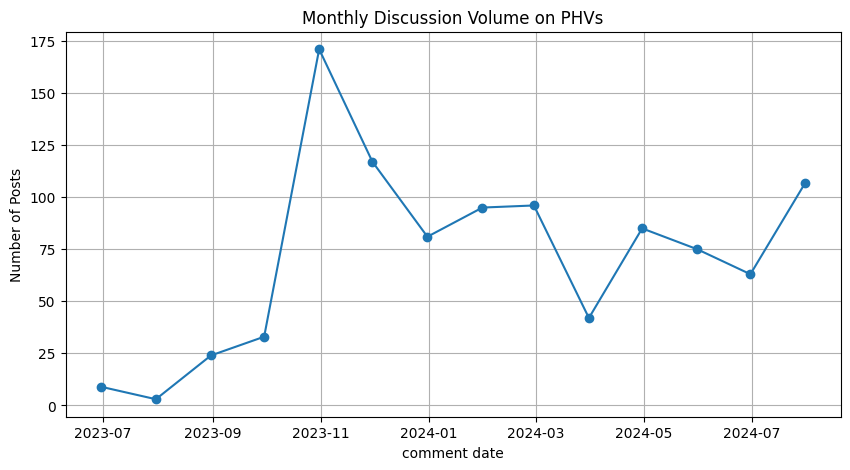

In [ ]:
# Resample and count posts per month
post_volume = df_cleaned['title'].resample('M').count()  # 'M' for monthly frequency

# Plot
plt.figure(figsize=(10, 5))
plt.plot(post_volume.index, post_volume.values, marker='o', linestyle='-')
plt.title('Monthly Discussion Volume')  # Update the title accordingly
plt.xlabel('comment date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()


In [ ]:
#prepare text data
texts = [doc.split() for doc in df_cleaned['selftext']]
#create a dictionary for representing the documents
dictionary = corpora.Dictionary(texts)
#filter out words that occur in less than 20 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)
#convert dictionary to a Bag of Words
corpus = [dictionary.doc2bow(text) for text in texts]
# LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.022*"invad" + 0.022*"educ" + 0.018*"invas" + 0.018*"peopl" + 0.016*"think"')
(1, '0.049*"iran" + 0.018*"would" + 0.015*"israel" + 0.013*"like" + 0.012*"im"')
(2, '0.036*"russia" + 0.020*"ukrain" + 0.017*"west" + 0.013*"western" + 0.012*"countri"')
(3, '0.015*"also" + 0.013*"war" + 0.010*"school" + 0.010*"ukrain" + 0.009*"camp"')
(4, '0.028*"israel" + 0.024*"gaza" + 0.024*"hama" + 0.016*"eas" + 0.016*"energi"')
(5, '0.047*"taiwan" + 0.027*"chip" + 0.025*"china" + 0.023*"tsmc" + 0.015*"advanc"')
(6, '0.045*"korea" + 0.044*"russia" + 0.039*"north" + 0.017*"war" + 0.013*"geopolit"')
(7, '0.028*"would" + 0.026*"palestinian" + 0.024*"refuge" + 0.017*"world" + 0.017*"war"')
(8, '0.061*"china" + 0.020*"india" + 0.016*"taiwan" + 0.015*"chines" + 0.014*"econom"')
(9, '0.090*"argentina" + 0.073*"dollar" + 0.067*"usd" + 0.061*"bric" + 0.050*"reserv"')


sentiment_category
positive    445
negative    424
neutral     132
Name: count, dtype: int64


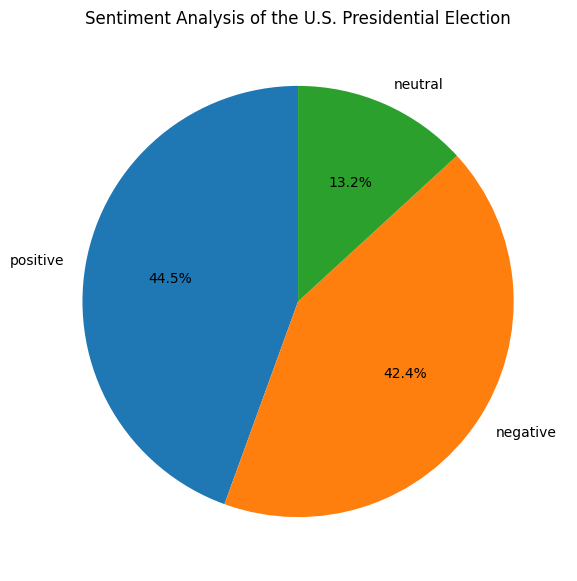

In [ ]:
#initialize VADER
sia = SentimentIntensityAnalyzer()

#apply VADER for each document
df_cleaned['sentiments'] = df_cleaned['selftext'].apply(lambda text: sia.polarity_scores(text)['compound'])

#categorize sentiments
df_cleaned['sentiment_category'] = df_cleaned['sentiments'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))
print(df_cleaned['sentiment_category'].value_counts())
# Sentiment Analysis Pie Chart
sentiment_counts = df_cleaned['sentiment_category'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Analysis of the U.S. Presidential Election')
plt.show()

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.37330278876865564


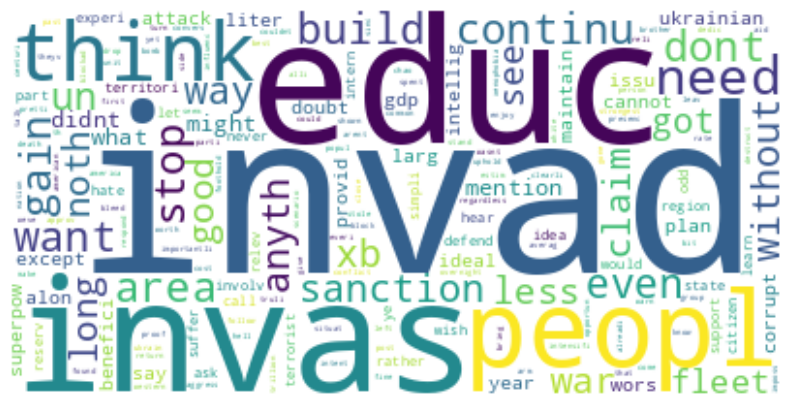

In [ ]:
#generate word cloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(lda_model.show_topic(0, 200)))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_cleaned.to_csv('The_USA_Election.csv')

**Machin Learning**

In [ ]:
# Load the dataset
dataset_path = '/content/The_USA_Election.csv'
dataset = pd.read_csv(dataset_path)

# Fill missing values with an empty string
dataset.fillna('', inplace=True)

In [ ]:
# Combine all text columns to have all the text data in one place
dataset['combined_text'] = dataset['title'] + ' ' + dataset['selftext'] + ' ' + dataset['top_level_comment']+ ' ' + dataset['second_level_comment']+ ' ' + dataset['third_level_comment']

# Define the features and labels
X = dataset['combined_text']
y = dataset['sentiment_category']

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define a function that returns a dictionary with three objects: unigrams, bigrams, and trigrams.
def get_vectorizers():
    return {
        'unigram': CountVectorizer(ngram_range=(1, 1)),
        'bigram': CountVectorizer(ngram_range=(2, 2)),
        'trigram': CountVectorizer(ngram_range=(3, 3))
    }

# This step transforms the text data into a numerical format suitable for machine learning algorithms
vectorizers = get_vectorizers()
X_train_vectors = {name: vectorizer.fit_transform(X_train) for name, vectorizer in vectorizers.items()}
X_test_vectors = {name: vectorizer.transform(X_test) for name, vectorizer in vectorizers.items()}

# Define a dictionary containing the five machine learning algorithms to evaluate.
models = {
    'LR': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'RF': RandomForestClassifier(),
    'NB': MultinomialNB(),
    'KNN': KNeighborsClassifier()
}

# Define a function that trains each model on the training data, makes predictions on the testing data,
  #and calculates the accuracy, precision, recall, and F1 score for each model. The results are stored in a list.
def evaluate_models(X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        results.append([name, accuracy, precision, recall, f1])
    return results

# For each type of n-gram (unigram, bigram, trigram), train and evaluate the models, and store the results in a dictionary results
results = {}
for ngram, X_train_vector in X_train_vectors.items():
    X_test_vector = X_test_vectors[ngram]
    results[ngram] = evaluate_models(X_train_vector, X_test_vector, y_train, y_test)

# Convert the results into pandas DataFrames for better readability
results_dfs = {ngram: pd.DataFrame(result, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']) for ngram, result in results.items()}

# Loop through the results and print the performance metrics for each type of n-gram
for ngram, df in results_dfs.items():
    print(f"Results for {ngram.upper()}:")
    print(df)
    print("\n")


Results for UNIGRAM:
  Model  Accuracy  Precision    Recall  F1 Score
0    LR  0.955224   0.956839  0.947065  0.951784
1   SVM  0.955224   0.956839  0.947065  0.951784
2    RF  0.965174   0.973874  0.945408  0.958387
3    NB  0.905473   0.934185  0.826713  0.860622
4   KNN  0.865672   0.824099  0.888683  0.842084


Results for BIGRAM:
  Model  Accuracy  Precision    Recall  F1 Score
0    LR  0.995025   0.987654  0.995781  0.991588
1   SVM  0.990050   0.976190  0.991561  0.983381
2    RF  0.955224   0.971429  0.919020  0.940956
3    NB  0.930348   0.879807  0.908765  0.891206
4   KNN  0.761194   0.783784  0.819137  0.735132


Results for TRIGRAM:
  Model  Accuracy  Precision    Recall  F1 Score
0    LR  0.990050   0.976190  0.991561  0.983381
1   SVM  0.990050   0.976190  0.991561  0.983381
2    RF  0.960199   0.952614  0.931840  0.941241
3    NB  0.905473   0.850680  0.889910  0.861793
4   KNN  0.731343   0.775000  0.798303  0.710315




In [ ]:
pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Word to analyze
word = "hate"

# Get the sentiment score
score = analyzer.polarity_scores(word)

# Print the sentiment scores
print(f"Sentiment scores for '{word}': {score}")


Sentiment scores for 'hate': {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
